In [190]:
import pandas as pd
import numpy as np
import tensorflow as tf
import sys

import neural_net
import data_funcs

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [20]:
DATASET_PATH = './data/'

## Classification - simple dataset

In [292]:
# Set the hyperparameters
layer_sizes = [128,32]
batch_size = 25
learning_rate = .0001
dropout_prob = 0.5
weight_penalty = 0.01
clip_gradients = True

In [293]:
# If you make changes to the .py files, you will need to reload them before
# the jupyter notebook can see the changes. 
reload(neural_net)
neural_net.reload_files()

In [294]:
# Initialize the neural network class with the settings and hyperparameters
net = neural_net.NeuralNetwork(DATASET_PATH + 'classification-simple.csv', 'simple_classifier', 
                               layer_sizes, batch_size, learning_rate, dropout_prob, 
                               weight_penalty, clip_gradients)

Original data length was 1000
After dropping rows with nan in any label column, length is 1000
583 rows in training data
230 rows in validation data
187 rows in testing data

Performing classification.
Input dimensions (number of features): 2
Number of classes/outputs: 2

Building computation graph...
Okay, making a neural net with the following structure:
[('2x128', '128'), ('128x32', '32'), ('32x2', '2')]


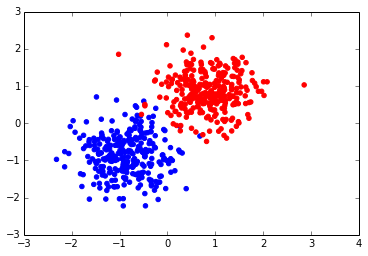

In [295]:
net.plot_binary_classification_data()

In [296]:
# Perform SGD
net.train(num_steps=200)

Training iteration 0
	 Training accuracy 0.32
	 Validation accuracy 0.482609
Training iteration 10
	 Training accuracy 0.52
	 Validation accuracy 0.482609
Training iteration 20
	 Training accuracy 0.52
	 Validation accuracy 0.482609
Training iteration 30
	 Training accuracy 0.56
	 Validation accuracy 0.482609
Training iteration 40
	 Training accuracy 0.44
	 Validation accuracy 0.482609
Training iteration 50
	 Training accuracy 0.56
	 Validation accuracy 0.482609
Training iteration 60
	 Training accuracy 0.48
	 Validation accuracy 0.482609
Training iteration 70
	 Training accuracy 0.72
	 Validation accuracy 0.482609
Training iteration 80
	 Training accuracy 0.72
	 Validation accuracy 0.482609
Training iteration 90
	 Training accuracy 0.76
	 Validation accuracy 0.482609
Training iteration 100
	 Training accuracy 0.6
	 Validation accuracy 0.586957
Training iteration 110
	 Training accuracy 0.8
	 Validation accuracy 0.63913
Training iteration 120
	 Training accuracy 0.72
	 Validation accur

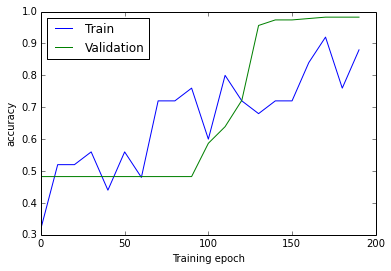

In [297]:
net.plot_training_progress()

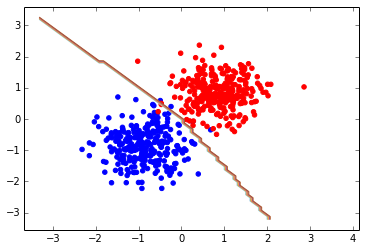

In [298]:
# See the decision boundary learned by the neural network
net.plot_binary_classification_data(with_decision_boundary=True)

In [ ]:
# To see the tensorflow model you've built in tensorboard, run the following
journalist = tf.summary.FileWriter(net.checkpoint_dir, graph=net.session.graph)
journalist.flush()

# Now enter the following command at the command line
# > tensorboard --logdir 'saved_models'
# (you may need to replace 'saved_models' with the path to the actual 
# net.checkpoint_dir you are using)

## Classification - XOR dataset

In [299]:
# Set the hyperparameters
layer_sizes = [512,128,32]
batch_size = 25
learning_rate = .001
dropout_prob = 0.5
weight_penalty = 0.01
clip_gradients = True

In [300]:
reload(neural_net)
neural_net.reload_files()

In [301]:
net = neural_net.NeuralNetwork(DATASET_PATH + 'classification-xor.csv', 'xor_classifier', 
                               layer_sizes, batch_size, learning_rate, dropout_prob, 
                               weight_penalty, clip_gradients)

Original data length was 1000
After dropping rows with nan in any label column, length is 1000
599 rows in training data
195 rows in validation data
206 rows in testing data

Performing classification.
Input dimensions (number of features): 2
Number of classes/outputs: 2

Building computation graph...
Okay, making a neural net with the following structure:
[('2x512', '512'), ('512x128', '128'), ('128x32', '32'), ('32x2', '2')]


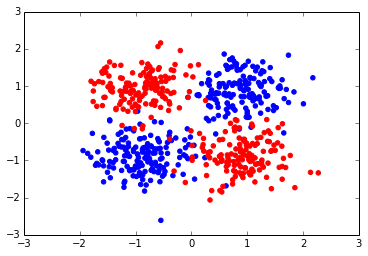

In [302]:
net.plot_binary_classification_data()

In [303]:
net.train(num_steps=200)

Training iteration 0
	 Training accuracy 0.8
	 Validation accuracy 0.502564
Training iteration 10
	 Training accuracy 0.84
	 Validation accuracy 0.85641
Training iteration 20
	 Training accuracy 0.8
	 Validation accuracy 0.933333
Training iteration 30
	 Training accuracy 0.76
	 Validation accuracy 0.928205
Training iteration 40
	 Training accuracy 0.88
	 Validation accuracy 0.933333
Training iteration 50
	 Training accuracy 0.96
	 Validation accuracy 0.928205
Training iteration 60
	 Training accuracy 0.96
	 Validation accuracy 0.933333
Training iteration 70
	 Training accuracy 0.96
	 Validation accuracy 0.938462
Training iteration 80
	 Training accuracy 0.88
	 Validation accuracy 0.933333
Training iteration 90
	 Training accuracy 0.96
	 Validation accuracy 0.928205
Training iteration 100
	 Training accuracy 0.96
	 Validation accuracy 0.928205
Training iteration 110
	 Training accuracy 0.92
	 Validation accuracy 0.938462
Training iteration 120
	 Training accuracy 0.96
	 Validation accur

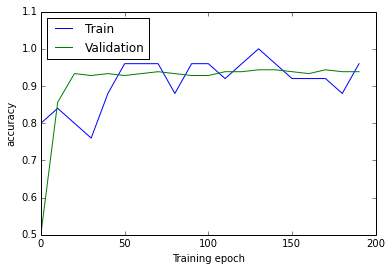

In [304]:
net.plot_training_progress()

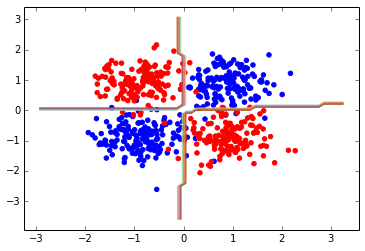

In [95]:
net.plot_binary_classification_data(with_decision_boundary=True)

## Regression - sin wave

In [262]:
# Set the hyperparameters
layer_sizes = [128,32]
batch_size = 25
learning_rate = .001
dropout_prob = 1.0
weight_penalty = 0.0
clip_gradients = True

In [263]:
reload(neural_net)
neural_net.reload_files()

In [264]:
net = neural_net.NeuralNetwork(DATASET_PATH + 'regression-sin.csv', 'sin_regressor', 
                               layer_sizes, batch_size, learning_rate, dropout_prob, 
                               weight_penalty, clip_gradients, output_type='regression')

Original data length was 500
After dropping rows with nan in any label column, length is 500
308 rows in training data
96 rows in validation data
96 rows in testing data

Performing regression.
Input dimensions (number of features): 1
Number of classes/outputs: 1

Building computation graph...
Okay, making a neural net with the following structure:
[('1x128', '128'), ('128x32', '32'), ('32x1', '1')]


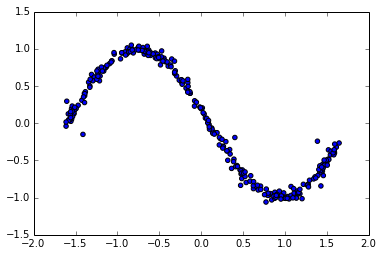

In [265]:
net.plot_regression_data()

In [266]:
net.train(num_steps=3000, output_every_nth=300)

Training iteration 0
	 Training RMSE 0.631077164221
	 Validation RMSE 0.593368879474
Training iteration 300
	 Training RMSE 0.128687250379
	 Validation RMSE 0.0927418097666
Training iteration 600
	 Training RMSE 0.0570357495961
	 Validation RMSE 0.0633251470584
Training iteration 900
	 Training RMSE 0.0972708238413
	 Validation RMSE 0.0576901507933
Training iteration 1200
	 Training RMSE 0.0473471744583
	 Validation RMSE 0.058540912564
Training iteration 1500
	 Training RMSE 0.0467003389589
	 Validation RMSE 0.0594967614344
Training iteration 1800
	 Training RMSE 0.113939819514
	 Validation RMSE 0.0548670943287
Training iteration 2100
	 Training RMSE 0.0469821342878
	 Validation RMSE 0.0557284962555
Training iteration 2400
	 Training RMSE 0.0568949872568
	 Validation RMSE 0.0700502837032
Training iteration 2700
	 Training RMSE 0.0497487934987
	 Validation RMSE 0.0656990666991


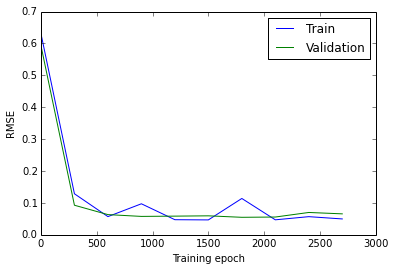

In [267]:
net.plot_training_progress()

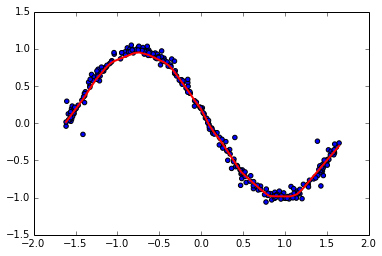

In [268]:
net.plot_regression_data(with_decision_boundary=True)

## Regression - step function

In [285]:
# Set the hyperparameters
layer_sizes = [128,32]
batch_size = 25
learning_rate = .001
dropout_prob = 1.0
weight_penalty = 0.0
clip_gradients = True

In [286]:
reload(neural_net)
neural_net.reload_files()

In [287]:
net = neural_net.NeuralNetwork(DATASET_PATH + 'regression-step.csv', 'step_regressor', 
                               layer_sizes, batch_size, learning_rate, dropout_prob, 
                               weight_penalty, clip_gradients, output_type='regression')

Original data length was 500
After dropping rows with nan in any label column, length is 500
314 rows in training data
86 rows in validation data
100 rows in testing data

Performing regression.
Input dimensions (number of features): 1
Number of classes/outputs: 1

Building computation graph...
Okay, making a neural net with the following structure:
[('1x128', '128'), ('128x32', '32'), ('32x1', '1')]


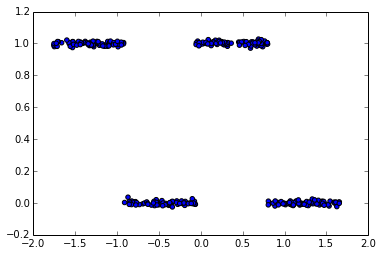

In [288]:
net.plot_regression_data()

In [289]:
net.train(num_steps=3500, output_every_nth=100)

Training iteration 0
	 Training RMSE 0.718162196989
	 Validation RMSE 0.738830644695
Training iteration 100
	 Training RMSE 0.315752868258
	 Validation RMSE 0.31282589347
Training iteration 200
	 Training RMSE 0.20721580558
	 Validation RMSE 0.221768577188
Training iteration 300
	 Training RMSE 0.277335168262
	 Validation RMSE 0.210814535837
Training iteration 400
	 Training RMSE 0.191903743103
	 Validation RMSE 0.185156899364
Training iteration 500
	 Training RMSE 0.168535084692
	 Validation RMSE 0.176970124924
Training iteration 600
	 Training RMSE 0.267743106325
	 Validation RMSE 0.166554015081
Training iteration 700
	 Training RMSE 0.236127921306
	 Validation RMSE 0.195067101261
Training iteration 800
	 Training RMSE 0.121154875502
	 Validation RMSE 0.180740820547
Training iteration 900
	 Training RMSE 0.181625834046
	 Validation RMSE 0.191025525122
Training iteration 1000
	 Training RMSE 0.128169517314
	 Validation RMSE 0.152968167774
Training iteration 1100
	 Training RMSE 0.1455

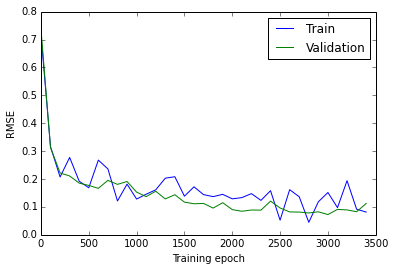

In [290]:
net.plot_training_progress()

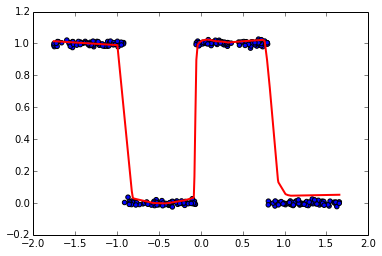

In [291]:
net.plot_regression_data(with_decision_boundary=True)